In [6]:
import pandas as pd

In [8]:
df = pd.read_csv("./us_migration.csv")
df.head()

,sending,sending_citizen_unspecified,sending_citizenship_unknown,sending_household_not_owned,sending_household_owned,sending_household_owned_unknown,sending_indigeneity,sending_internet,sending_internet_unknown,sending_marriage_unknown,...,sending_unknown_employment_status,sending_unknown_indigeneity,sending_unpaid_worker,sending_urban,sending_weighted_avg_income,sending_weighted_avg_income_abroad,sending_weighted_avg_no_income_abroad,sending_weighted_avg_unknown_income_abroad,sending_widowed,US_MIG_05_10
0,10001,1134.995083,243.827586,1178.209016,1106.832815,736.562500,918.960526,2111.233685,347.698113,576.362069,...,1218.357143,840.339623,0,1597.239059,1124.200953,768.788518,1213.505104,1931.825000,460.430041,961
1,10002,917.067746,600.000000,1274.160656,795.118020,-1.000000,-1.000000,1988.103175,459.166667,342.800000,...,535.750000,576.379310,0,-1.000000,908.782316,720.767123,929.317603,845.567568,745.377359,154
2,10003,637.977315,557.150000,729.454795,610.791414,468.392857,584.454545,1310.462428,514.312500,3800.000000,...,540.000000,629.215385,0,-1.000000,628.585520,486.116034,738.533015,-1.000000,276.569767,905
3,10004,1178.378744,1678.562500,1560.244328,1084.109969,785.742857,1165.943463,2109.431851,1043.500000,549.695652,...,771.400000,694.579439,0,1436.934837,1173.751889,861.385645,1219.547797,1643.137255,741.363985,225
4,10005,2231.128863,2916.538705,2104.943216,2278.834178,2353.519005,2527.268790,3075.771459,1941.578834,650.206897,...,1531.622086,2064.311411,0,2319.113608,2230.022635,1672.340116,2273.630651,3946.180995,1241.236982,1071


<AxesSubplot:>

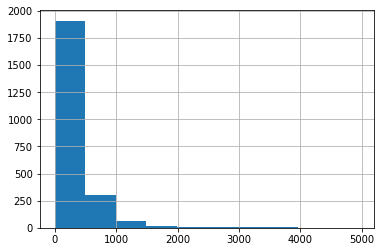

In [9]:
df['US_MIG_05_10'].hist()

In [15]:
df['class'] = pd.qcut(x = df['US_MIG_05_10'], q = 10, labels = ["1","2","3","4","5","6","7","8","9","10"])

In [16]:
df['class'].value_counts()

1     239
10    233
7     233
6     233
4     233
9     232
3     232
5     231
8     230
2     226
Name: class, dtype: int64

In [75]:
def weighted_sample(df, num_classes):
    labs = [str(i) for i in range(num_classes)]
    df['class'] = pd.qcut(x = df['US_MIG_05_10'], q = num_classes, labels = labs)
    print(df['class'].value_counts())

    send = []
    mig = []

    while len(df) > 10:
        cur_batch_sending, cur_batch_mig = [], []
        for i in range(num_classes):
            
            tmp = df[df['class'] == str(i)]#
            
            if len(tmp) > 0:
                tmp = tmp.sample(1)
                # print(tmp['sending'].to_list()[0])
                # print(tmp['US_MIG_05_10'].to_list()[0])
                cur_batch_sending.append(tmp['sending'].to_list()[0])
                cur_batch_mig.append(tmp['US_MIG_05_10'].to_list()[0])
                df = df[df['sending'] != tmp['sending'].to_list()[0]]
                # print(cur_batch_sending)

            print(df.shape)

            
            # print(cur_batch_mig)

        send.append(cur_batch_sending)
        mig.append(cur_batch_mig)
                
    return send, mig

In [76]:
send, mig = weighted_sample(df, 10)

2)
(1911, 32)
(1910, 32)
(1909, 32)
(1908, 32)
(1907, 32)
(1906, 32)
(1905, 32)
(1904, 32)
(1903, 32)
(1902, 32)
(1901, 32)
(1900, 32)
(1899, 32)
(1898, 32)
(1897, 32)
(1896, 32)
(1895, 32)
(1894, 32)
(1893, 32)
(1892, 32)
(1891, 32)
(1890, 32)
(1889, 32)
(1888, 32)
(1887, 32)
(1886, 32)
(1885, 32)
(1884, 32)
(1883, 32)
(1882, 32)
(1881, 32)
(1880, 32)
(1879, 32)
(1878, 32)
(1877, 32)
(1876, 32)
(1875, 32)
(1874, 32)
(1873, 32)
(1872, 32)
(1871, 32)
(1870, 32)
(1869, 32)
(1868, 32)
(1867, 32)
(1866, 32)
(1865, 32)
(1864, 32)
(1863, 32)
(1862, 32)
(1861, 32)
(1860, 32)
(1859, 32)
(1858, 32)
(1857, 32)
(1856, 32)
(1855, 32)
(1854, 32)
(1853, 32)
(1852, 32)
(1851, 32)
(1850, 32)
(1849, 32)
(1848, 32)
(1847, 32)
(1846, 32)
(1845, 32)
(1844, 32)
(1843, 32)
(1842, 32)
(1841, 32)
(1840, 32)
(1839, 32)
(1838, 32)
(1837, 32)
(1836, 32)
(1835, 32)
(1834, 32)
(1833, 32)
(1832, 32)
(1831, 32)
(1830, 32)
(1829, 32)
(1828, 32)
(1827, 32)
(1826, 32)
(1825, 32)
(1824, 32)
(1823, 32)
(1822, 32)
(1821, 

In [77]:
mig

[[0, 38, 55, 115, 182, 216, 286, 345, 579, 786],
 [11, 23, 65, 139, 144, 215, 299, 371, 585, 848],
 [4, 26, 58, 138, 167, 247, 299, 344, 661, 2435],
 [0, 37, 75, 99, 167, 258, 322, 381, 545, 1433],
 [5, 30, 66, 93, 171, 242, 313, 372, 649, 1066],
 [11, 40, 77, 98, 147, 205, 265, 364, 497, 1034],
 [0, 26, 54, 125, 194, 246, 282, 441, 471, 811],
 [16, 37, 55, 101, 175, 235, 280, 429, 620, 1447],
 [4, 51, 82, 126, 144, 211, 296, 365, 491, 830],
 [10, 44, 54, 94, 142, 204, 325, 353, 515, 937],
 [0, 40, 92, 133, 178, 198, 341, 364, 585, 723],
 [0, 29, 56, 130, 187, 228, 306, 346, 482, 900],
 [21, 34, 92, 125, 179, 223, 283, 425, 474, 1974],
 [12, 41, 87, 137, 193, 202, 305, 458, 594, 1095],
 [0, 40, 78, 103, 191, 220, 330, 381, 516, 1268],
 [3, 38, 84, 127, 144, 249, 298, 409, 521, 708],
 [20, 46, 88, 137, 149, 219, 325, 460, 482, 667],
 [10, 51, 68, 104, 154, 201, 333, 348, 570, 984],
 [6, 29, 53, 109, 161, 248, 330, 374, 492, 3840],
 [11, 45, 85, 93, 155, 202, 302, 371, 471, 877],
 [19, 4